In [22]:
import pandas as pd
import os
import sys

# Make `src` dir can be imported
project_root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))  # /aicup-predict-energy-generation
sys.path.append(project_root_path)

from src.utils import load_dataframes

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# folder_path = '../data/raw_data/'

# df_raw_data = load_dataframes(folder_path)

# df_raw_data['DateTime'] = pd.to_datetime(df_raw_data['DateTime'])
# df_raw_data.columns = ['locationcode', 'datetime', 'windspeed', 'pressure', 'temperature', 'humidity', 'sunlight', 'power', 'device']
# df_raw_data.to_csv('../data/processed_data/combined_data.csv', index=False, header=True)

In [24]:
df_raw_data = pd.read_csv('../data/processed_data/combined_data.csv')
df_raw_data['datetime'] = pd.to_datetime(df_raw_data['datetime'])
# make sure the sorting is correct
df_raw_data = df_raw_data.sort_values(by=['device','datetime']).reset_index(drop=True)

In [25]:
df_raw_data.head()

,locationcode,datetime,windspeed,pressure,temperature,humidity,sunlight,power,device
0,1,2024-01-01 06:31:08,0.0,1016.50,17.5,86.8,25.00,0.0,L1
1,1,2024-01-01 06:32:08,0.0,1016.53,17.5,86.7,28.33,0.0,L1
2,1,2024-01-01 06:33:08,0.0,1016.57,17.5,86.7,32.50,0.0,L1
3,1,2024-01-01 06:34:08,0.0,1016.58,17.5,86.7,39.17,0.0,L1
4,1,2024-01-01 06:35:08,0.0,1016.59,17.5,86.7,45.83,0.0,L1


Note:
- 0 weedspeed means no reasonable data.
- The maximum value of Sunlight(Lux) in device is 117758.2 lux, however the energy generation is still going.
    - we may need a model(ex. regression) to estimate the sunglight.

## Helper functions

In [26]:
# create time related features
def create_time_features(df, input_column) -> pd.DataFrame:
    df_copy = df.copy()
    df_copy[input_column] = pd.to_datetime(df_copy[input_column])
    df_copy['date'] = df_copy[input_column].dt.date
    df_copy['year'] = df_copy[input_column].dt.year
    df_copy['month'] = df_copy[input_column].dt.month
    df_copy['hour'] = df_copy[input_column].dt.hour
    df_copy['min'] = df_copy[input_column].dt.minute

    return df_copy

In [31]:
# check different time frame data numbers
def timeframe_data_number(df, target_column):
    
    return df.pivot_table(index=target_column, columns='device', aggfunc='size', fill_value=0)

# EDA

In [27]:
df_data = create_time_features(df_raw_data, 'datetime')

data number check

In [28]:
# the data numbers is not consist across devices
df_data.device.value_counts()

device
L8     116999
L1     101673
L17     96642
L10     91340
L9      89612
L2      87080
L15     85240
L16     83258
L12     82911
L13     69506
L14     66151
L11     56968
L4      56900
L3      55380
L5      55157
L6      52559
L7      43518
Name: count, dtype: int64

count data numbers by each date - L8 

In [34]:
pivot_date_device = timeframe_data_number(df_data, target_column='date')
pivot_date_device.head(20)

device,L1,L10,L11,L12,L13,L14,L15,L16,L17,L2,L3,L4,L5,L6,L7,L8,L9
date,,,,,,,,,,,,,,,,,
2024-01-01,657,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
2024-01-02,667,0,0,0,0,0,0,0,672,0,0,0,0,0,0,0,0
2024-01-03,661,0,0,0,0,0,0,0,663,0,0,0,0,0,0,0,0
2024-01-04,669,0,0,0,0,0,0,0,668,0,0,0,0,0,0,0,0
2024-01-05,674,0,0,0,0,0,0,0,675,0,0,0,0,0,0,0,0
2024-01-06,158,0,0,0,0,0,0,0,673,0,0,0,0,0,0,651,0
2024-01-07,658,0,0,0,0,0,0,0,658,0,0,0,0,0,0,645,0
2024-01-08,674,0,0,0,0,0,0,0,674,0,0,0,0,0,0,671,0
2024-01-09,670,0,0,0,0,0,0,0,671,0,0,0,0,0,0,663,0


In [36]:
pivot_date_device = timeframe_data_number(df_data, target_column='hour')
pivot_date_device.head(20)

device,L1,L10,L11,L12,L13,L14,L15,L16,L17,L2,L3,L4,L5,L6,L7,L8,L9
hour,,,,,,,,,,,,,,,,,
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,227,120,4,23,70,119,153,243,225,66,98,252,241,297,299,76,98
5,4778,5462,2405,4320,2538,3047,4112,4657,3736,3296,2937,4285,4115,4012,3339,5260,4767
6,7809,7713,4670,6719,5590,5423,6494,6438,7831,6741,4514,4408,4216,4020,3348,9513,7214
7,9054,7739,4749,6780,5938,5458,6631,6416,9099,7421,4523,4379,4200,4019,3278,10623,7293
8,8911,7740,4776,6745,5922,5466,6608,6426,9080,7155,4516,4380,4199,4020,3356,10378,7208
9,7277,6480,4337,6179,5386,4900,6230,5992,7173,6464,4194,4020,3839,3660,3083,8497,6732
10,7228,6480,4317,6180,5258,4828,6269,6000,7197,6452,4109,3980,3854,3660,3033,8588,6636
11,7213,6514,4349,6161,5072,4817,6371,6002,7201,6573,4017,3960,3842,3660,3060,8577,6508


datetime check: L8 as example

In [39]:
df_l8 = df_data[df_data['device'] == 'L8']
df_l17 = df_data[df_data['device'] == 'L17']

In [41]:
df_l8

,locationcode,datetime,windspeed,pressure,temperature,humidity,sunlight,power,device,date,year,month,hour,min
1084283,8,2024-01-06 06:21:19,0.0,1016.10,14.67,80.94,23.33,0.00,L8,2024-01-06,2024,1,6,21
1084284,8,2024-01-06 06:22:19,0.0,1016.10,14.65,80.95,25.83,0.00,L8,2024-01-06,2024,1,6,22
1084285,8,2024-01-06 06:23:19,0.0,1016.07,14.63,81.00,30.83,0.00,L8,2024-01-06,2024,1,6,23
1084286,8,2024-01-06 06:24:19,0.0,1016.02,14.61,81.02,35.00,0.00,L8,2024-01-06,2024,1,6,24
1084287,8,2024-01-06 06:25:19,0.0,1016.06,14.60,81.07,41.67,0.00,L8,2024-01-06,2024,1,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201277,8,2024-08-31 15:07:16,0.0,1002.31,40.37,38.86,12590.83,32.83,L8,2024-08-31,2024,8,15,7
1201278,8,2024-08-31 15:08:16,0.0,1002.33,40.13,39.45,13351.67,40.63,L8,2024-08-31,2024,8,15,8
1201279,8,2024-08-31 15:09:16,0.0,1002.36,39.96,40.12,13168.33,38.16,L8,2024-08-31,2024,8,15,9
1201280,8,2024-08-31 15:10:16,0.0,1002.36,39.57,40.80,13605.83,43.10,L8,2024-08-31,2024,8,15,10


Missing values

In [10]:
df_raw_data.isnull().sum()

locationcode    0
datetime        0
windspeed       0
pressure        0
temperature     0
humidity        0
sunlight        0
power           0
device          0
dtype: int64

Description

In [11]:
df_raw_data.describe()

,locationcode,datetime,windspeed,pressure,temperature,humidity,sunlight,power
count,1.290894e+06,1290894,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06,1.290894e+06
mean,9.238676e+00,2024-05-02 00:25:33.866149120,3.225913e-01,1.009297e+03,3.048565e+01,6.933431e+01,2.133491e+04,2.483036e+02
min,1.000000e+00,2024-01-01 06:29:01,0.000000e+00,9.581500e+02,2.000000e+00,1.143000e+01,2.000000e+01,0.000000e+00
25%,5.000000e+00,2024-03-20 14:00:43,0.000000e+00,1.004600e+03,2.384000e+01,4.948000e+01,2.798330e+03,1.940000e+00
50%,9.000000e+00,2024-05-07 06:18:05,0.000000e+00,1.008290e+03,2.932000e+01,7.139000e+01,8.405830e+03,1.709000e+01
75%,1.400000e+01,2024-06-15 18:19:54,0.000000e+00,1.013510e+03,3.569000e+01,9.382000e+01,2.626333e+04,1.693400e+02
max,1.700000e+01,2024-08-31 15:11:16,1.725000e+01,9.014550e+03,6.180000e+01,3.000000e+02,1.177582e+05,2.626480e+03
std,5.050529e+00,NaN,7.665733e-01,1.678630e+01,8.962605e+00,2.488200e+01,2.893169e+04,4.830954e+02


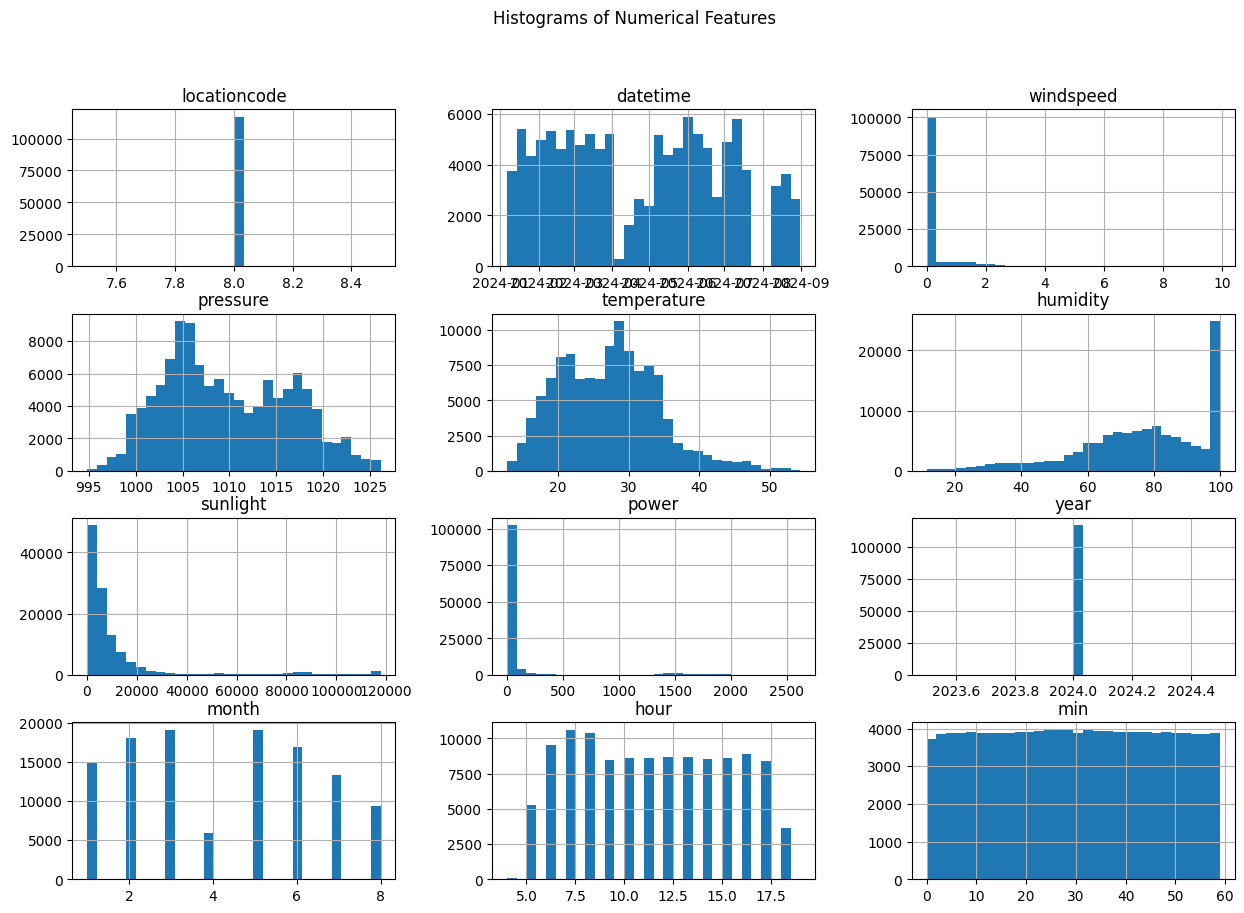

In [42]:
df_l8.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

- the difference of pressure is relative small compared with other features, we may need processed this if this feature is important.

In [13]:
def power_datetime(df, device):

    df = df[df['device'] == device]

    plt.figure(figsize=(15, 6))
    plt.plot(df['datetime'], df['power'], label='Power (mW)')
    plt.xlabel("DateTime")
    plt.ylabel("Power (mW)")
    plt.title("Power Output Over Time")
    plt.legend()
    plt.show()


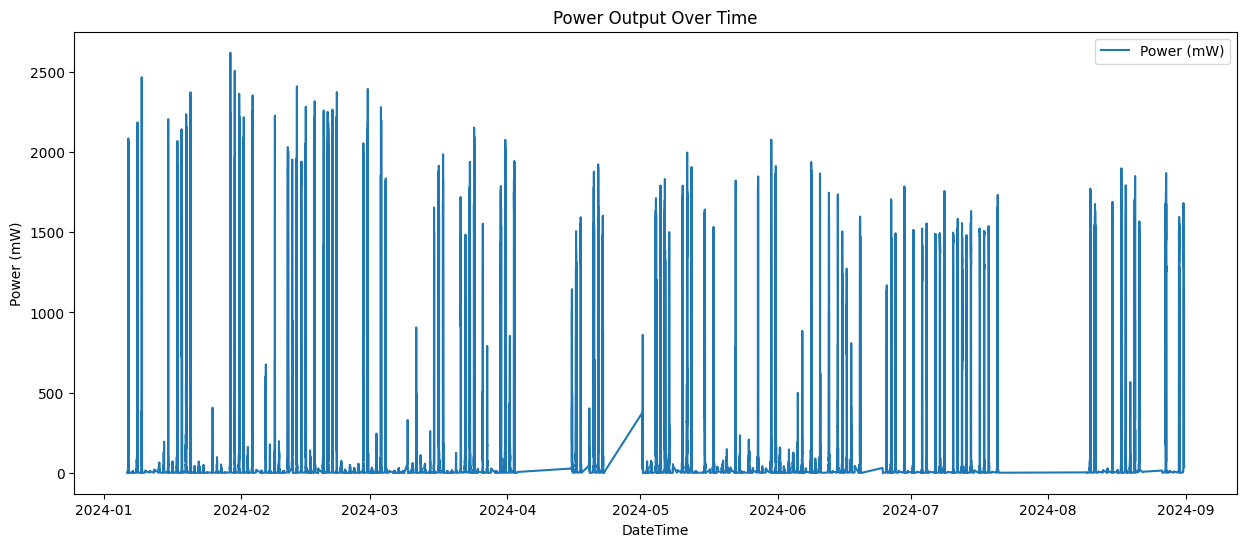

In [43]:
power_datetime(df_raw_data, device='L8')

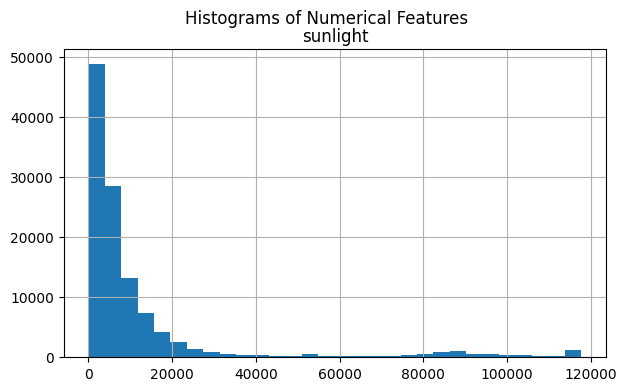

In [46]:
df_l8[['sunlight']].hist(bins=30, figsize=(7, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()